<a href="https://colab.research.google.com/github/codexfast/CreativeAI/blob/main/CreativeAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title # Instalação

# Baixa reposiório back-end
%cd /content
!git clone https://github.com/codexfast/creative-ai-backend.git /content/CreativeAI

# Instala as dependências
%cd /content/CreativeAI
!pip install -r requirements.txt

# Baixa reposiório ComfyUI(totoro4)
!git clone -b totoro4 https://github.com/camenduru/ComfyUI /content/CreativeAI/totoro4

# Instala necessários
!pip install pyngrok
!pip install qrcode[pil]
!pip install -q torchsde einops diffusers accelerate xformers==0.0.28.post2 python-multipart==0.0.12
!pip install --upgrade --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!apt -y install -qq aria2

# Baixa Modelos, Lora, VAe, etc...

"""flux1-dev-fp8-all-in-one.safetensors"""
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/FLUX.1-dev/resolve/main/flux1-dev-fp8-all-in-one.safetensors -d /content/CreativeAI/models/checkpoints -o flux1-dev-fp8-all-in-one.safetensors
"""flux_realism_lora.safetensors"""
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/FLUX.1-dev/resolve/main/flux_realism_lora.safetensors -d /content/CreativeAI/models/loras -o flux_realism_lora.safetensors

# Cria link entre diretôrios
!ln -s /content/CreativeAI/models/ /content/CreativeAI/totoro4/models


# Instala UI
%cd /content
!git clone https://github.com/codexfast/CreativeAI.git ui
%cd /content/ui
!npm install
!npm run build
%mkdir /content/CreativeAI/static/frontend
%mv /content/ui/dist/* /content/CreativeAI/static/frontend

/content/CreativeAI
URL pública do ngrok: https://3af0-34-125-39-118.ngrok-free.app



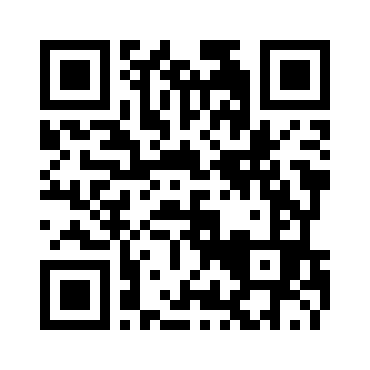

]11;?\]10;?\
   FastAPI   Starting production server 🚀
 
             Searching for package file structure from directories with         
             __init__.py files                                                  
Total VRAM 15095 MB, total RAM 12978 MB
pytorch version: 2.7.0+cu118
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.5.0+cu121 with CUDA 1201 (you have 2.7.0+cu118)
    Python  3.11.10 (you have 3.11.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
xformers version: 0.0.28.post2
Set vram state to: NORMAL_VRAM
Device: cuda:0 Tesla T4 : native
Using pytorch cross attention
Total VRAM 15095 MB, total RAM 12978 MB
pytorch version: 2.7.0+cu118
xformers version: 0.0.28.post2
Set vram state to: NORMAL_VRAM
Device: cuda:0 Tesla T4 : native
model weight d

In [ ]:
# @title # Iniciar

%cd /content/CreativeAI

from pyngrok import ngrok
from IPython.display import display
import qrcode

# Configure seu token (uma vez por sessão)
ngrok.set_auth_token("24eSP3ZWk4atiPW7OhjmzWZegPR_4EfutiPHqwnCLi6K73wkV")

# Abra o túnel na porta 8000
tunnel = ngrok.connect(8000)

# ✅ Obtenha apenas a URL pública
public_url = tunnel.public_url

print("URL pública do ngrok:", public_url)
print()
qr = qrcode.make(public_url)
display(qr)


try:
  !fastapi run
finally:
  print("Falha, encerrando aplicação!")
  ngrok.disconnect(public_url)
